<a href="https://colab.research.google.com/github/FernandaCorlix/TOPICOSDEIA/blob/main/CarpinteriaAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from random import random
import numpy as np

In [ ]:
class Individuo:
  def __init__(self,cromosoma) -> None:
    self.cromosoma=cromosoma
    self.fitness = None

class Estacion:
  def __init__(self,nombre,numero,pos_x,pos_y):
    self.nombre = nombre
    self.numero = numero
    self.pos_x = pos_x
    self.pos_y = pos_y

  def __str__(self):
    return f'Numero: {self.numero}, x={self.pos_x}, y= {self.pos_y}'

  def __repr__(self):
    return f'Numero: {self.numero}, x={self.pos_x}, y= {self.pos_y}'



In [ ]:
estaciones_acomodar = [0,1,2,3,4,5,6,7,0,0,0,0]
estaciones_ocupadas = {
    8:Estacion('mat. prima',8,1,4),
    9:Estacion('triplay',9,1,3),
    10:Estacion('almacen', 10, 4, 3),
    11:Estacion('baño', 11, 1, 1),
}
libres = [
    (1, 2),
    (2, 1),
    (2, 2),
    (2, 3),
    (2, 4),
    (3, 1),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 1),
    (4, 2),
    (4, 4),
]

In [ ]:
def generate_vector(n_genes):
  return [0.5] * n_genes

In [ ]:
def generate_candidate(vector):
  value = ""
  for prob in vector:
    value += "1" if random() < prob else "0"

  return Individuo(value)

In [ ]:
def update_vector(vector, winner, loser, population_size):
  vector_n = []
  for i in range(len(vector)):
    if winner[i] != loser[i]:
      if winner[i] == '1':
        vector[i] += 1.0 / float(population_size)
      else:
        vector[i] -= 1.0 / float(population_size)


In [ ]:
def compete(a,b):
  if a.fitness < b.fitness:
    return a, b
  else:
    return b, a

In [ ]:
def bits_disponibles(estaciones_disp):
  if estaciones_disp == 0:
    return 1
  else:
    return int(math.log2(estaciones_disp)) + 1

print(bits_disponibles(8))

4


In [ ]:
def fitness_function(ind):
  estaciones = dec_ind(ind.cromosoma)
  distancia_tot = distancia_total(estaciones)
  return distancia_tot


def distancia_total(estaciones):
  ruta = [1, 8, 1, 4, 5, 3, 4, 3, 1, 9, 1, 3, 1, 10]
  distancia_total = 0
  for i in range(1, len(ruta)):
    punto_1 = ruta[i-1]
    punto_2 = ruta[i]
    estacion_actual = estaciones[punto_1]
    estacion_siguiente = estaciones[punto_2]
    distancia_total = distancia_total + distancia_entre_puntos(estacion_actual,estacion_siguiente)

  return distancia_total

def distancia_entre_puntos(estacion_actual,estacion_siguiente):
  return math.sqrt(((estacion_siguiente.pos_x-estacion_actual.pos_x)**2)+((estacion_siguiente.pos_y-estacion_actual.pos_y)**2))


In [ ]:
def dec_ind(ind):
  estaciones_acomodar_copy = estaciones_acomodar.copy()
  estaciones_ocupadas_copy = estaciones_ocupadas.copy()
  ind2 = ind #cadena de bits recibida

  for i in range(len(libres)):
    cantidad_bits = bits_disponibles(len(estaciones_acomodar_copy))

    bits_seleccionados = ind2[:cantidad_bits]
    ind2 = ind2[cantidad_bits:]

    if not bits_seleccionados:
      elemento = 0
    else:
      elemento = int(bits_seleccionados,2)

    if elemento >= len(estaciones_acomodar_copy):
      elemento = len(estaciones_acomodar_copy) - 1

    estacion = estaciones_acomodar_copy.pop(elemento)

    if estacion == 0:
      continue

    x_pos, y_pos = libres[i]
    estacion_num = estacion
    #print(estacion_num)
    #print('xpos ypos',x_pos,y_pos)
    #print({estacion_num,x_pos,y_pos})
    estaciones_ocupadas_copy[estacion_num]=Estacion('',estacion_num, x_pos, y_pos)

  return estaciones_ocupadas_copy

In [ ]:
def run(generaciones, tamano, poblacion, fitness_function):
  vector = generate_vector(tamano)
  best = None


  for i in range(generaciones):

    a = generate_candidate(vector)
    b = generate_candidate(vector)

    a.fitness = fitness_function(a)
    b.fitness = fitness_function(b)

    winner, loser = compete(a, b)

    if best:
      if winner.fitness < best.fitness:
        best = winner
    else:
      best = winner

    update_vector(vector, winner.cromosoma, loser.cromosoma, poblacion)

    print("generation: %d best value: %s best fitness: %f" % (i + 1, best.cromosoma, float(best.fitness)))

  return best.cromosoma


In [ ]:
generaciones = 250
poblacion = 20
tamano = 31

In [ ]:
individuo=run(generaciones,tamano,poblacion,fitness_function)
print(individuo)

generation: 1 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 2 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 3 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 4 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 5 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 6 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 7 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 8 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 9 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 10 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 11 best value: 0001000100010011101000100111000 best fitness: 19.226773
generation: 12 best value: 0110101101000001001110001011101 best fitness: 18.307136
generation: 1

In [ ]:
estaciones = dec_ind(individuo)


estaciones


{8: Numero: 8, x=1, y= 4,
 9: Numero: 9, x=1, y= 3,
 10: Numero: 10, x=4, y= 3,
 11: Numero: 11, x=1, y= 1,
 3: Numero: 3, x=2, y= 2,
 1: Numero: 1, x=2, y= 3,
 2: Numero: 2, x=3, y= 1,
 5: Numero: 5, x=3, y= 2,
 4: Numero: 4, x=3, y= 3,
 6: Numero: 6, x=4, y= 1,
 7: Numero: 7, x=4, y= 2}

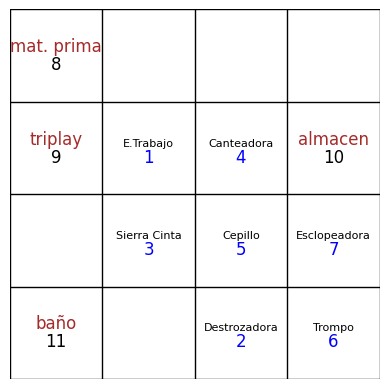

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in range(5):
    ax.axhline(y=i*2, color='k', linestyle='-', lw=1)
    ax.axvline(x=i*2, color='k', linestyle='-', lw=1)

textos_estaciones = {
    1: "E.Trabajo",
    2: "Destrozadora",
    3: "Sierra Cinta",
    4: "Canteadora",
    5: "Cepillo",
    6: "Trompo",
    7: "Esclopeadora"
}

for Estacion in estaciones:
    if estaciones[Estacion].numero not in [8, 9, 10, 11]:
        numero_estacion = estaciones[Estacion].numero
        texto_estacion = textos_estaciones.get(numero_estacion, '')
        x = (estaciones[Estacion].pos_x-0.5)*2
        y = (estaciones[Estacion].pos_y-0.5)*2
        ax.text(x, y, texto_estacion, ha='center', va='bottom', fontsize=8)
        ax.text(x, y, str(numero_estacion), ha='center', va='top', fontsize=12, color='blue')

for Num in list(estaciones_ocupadas.keys()):
    ax.text((estaciones[Num].pos_x-0.5)*2, (estaciones[Num].pos_y-0.5)*2, estaciones[Num].nombre, ha='center', va='bottom', fontsize=12, color="brown")
    ax.text((estaciones[Num].pos_x-0.5)*2, (estaciones[Num].pos_y-0.5)*2, estaciones[Num].numero, ha='center', va='top', fontsize=12, color="black")



ax.set_xlim(0, 8)
ax.set_ylim(0, 8)

ax.set_aspect('equal')

plt.axis('off')
plt.show()